## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_csv('slr.csv')
data

,Observation no,Advt,Sales
0,1,92,930
1,2,94,900
2,3,97,1020
3,4,98,990
4,5,100,1100
5,6,102,1050
6,7,104,1150
7,8,105,1120
8,9,105,1130
9,10,107,1200


In [3]:
data.shape

(12, 3)

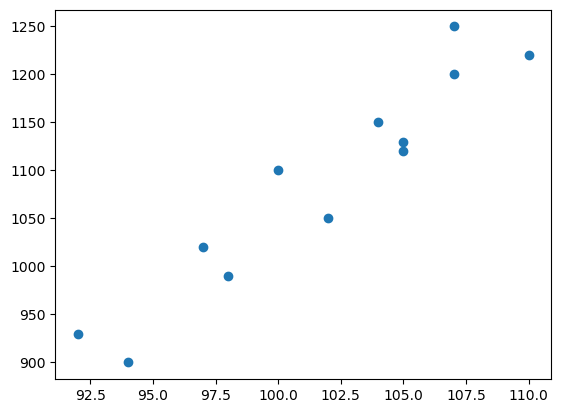

In [4]:
plt.scatter(data.Advt,data.Sales)
plt.show()

Now will try to build Linear Regression Model(OLS) :-

OLS stands for **Ordinary Least Squares**, and it is a method used in statistical modeling to estimate the parameters of a linear regression model. In a linear regression model, you are trying to find the relationship between a dependent variable (response variable) and one or more independent variables (predictor variables).

The Ordinary Least Squares method aims to find the line (or hyperplane in the case of multiple independent variables) that minimizes the sum of the squared differences between the observed values of the dependent variable and the values predicted by the linear model. The "least squares" part of the name refers to the fact that it minimizes the sum of the squared residuals.

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
model=smf.ols(formula='Sales~Advt',data=data).fit()

In [9]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     90.93
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           2.45e-06
Time:                        23:14:55   Log-Likelihood:                -59.299
No. Observations:                  12   AIC:                             122.6
Df Residuals:                      10   BIC:                             123.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -852.0842    203.776     -4.181      0.0

## Doing Manually Method No. 1

In [10]:
data

,Observation no,Advt,Sales
0,1,92,930
1,2,94,900
2,3,97,1020
3,4,98,990
4,5,100,1100
5,6,102,1050
6,7,104,1150
7,8,105,1120
8,9,105,1130
9,10,107,1200


In [11]:
copied_data = data.copy(deep=True)

In [12]:
data.drop('Observation no',axis=1,inplace=True)

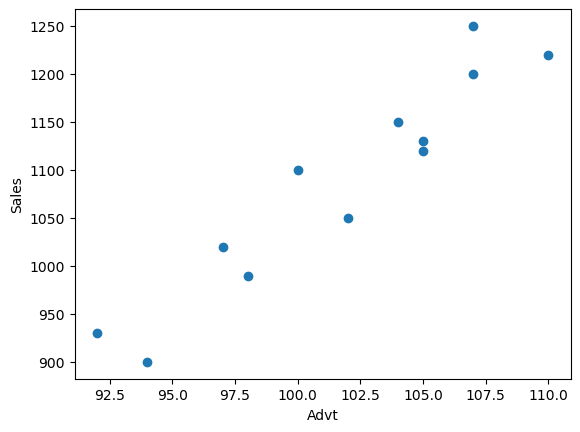

In [13]:
# lets print the scatter plot
plt.scatter(data.Advt,data.Sales)
plt.xlabel('Advt')
plt.ylabel('Sales')
plt.show()

<Axes: >

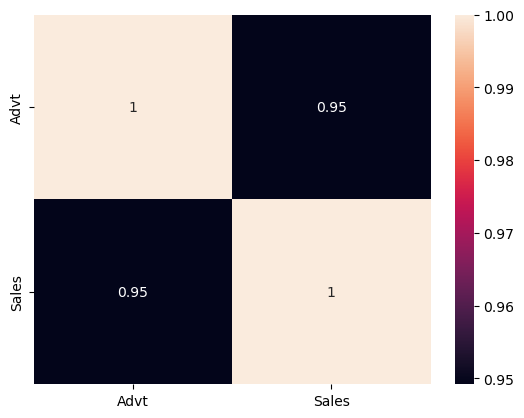

In [14]:
sns.heatmap(data.corr(),annot=True)

In [15]:
# now will find the mean

mean_x=np.mean(data.Advt)
mean_y=np.mean(data.Sales)
print('Mean of Advt =',mean_x)
print('Mean of Sales =',mean_y)

Mean of Advt = 101.75
Mean of Sales = 1088.3333333333333


In [16]:
# Now will find the coefficient 
# y=mx+c or y=a+bx  or y=b0+b1x1   # you can interpret in any way you want
# m=((xi-mean_x)(yi-mean_y))/(xi-mean_x)^2          
a=0
b=0
for i in range(len(data.Advt)):
    a+=(data.Advt[i]-mean_x)*(data.Sales[i]-mean_y)
    b+=(data.Advt[i]-mean_x)**2
m=a/b
print('Coefficient(m) =',m)

Coefficient(m) = 19.070442992011618


In [17]:
# will find the intercept       y=mx+c
c=0
for i in range(len(data.Advt)):
    c=mean_y-(m*mean_x)
print(c)

-852.0842411038489


In [18]:
# now will find the predicted value
# y_pred=mx+c
y_pred=[]
for i in range(len(data.Advt)):
    y_pred.append(m*data.Advt[i]+c)
print(y_pred)

[902.39651416122, 940.5374001452433, 997.7487291212781, 1016.8191721132896, 1054.9600580973129, 1093.1009440813361, 1131.2418300653594, 1150.312273057371, 1150.312273057371, 1188.4531590413942, 1188.4531590413942, 1245.664488017429]


In [19]:
sum(y_pred)

13059.999999999996

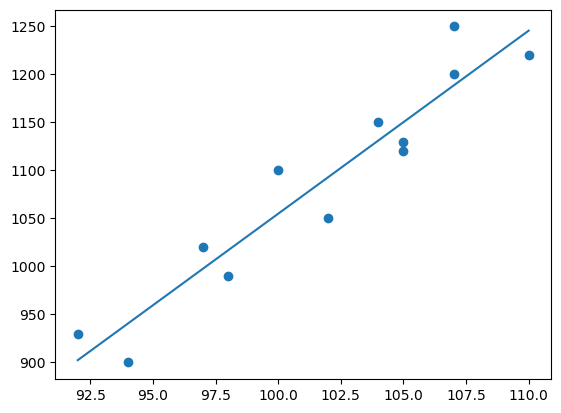

In [20]:
plt.plot(data.Advt,y_pred)
plt.scatter(data.Advt,data.Sales)
plt.show()

In [21]:
data.Advt.shape

(12,)

In [22]:
data.Sales.shape

(12,)

In [23]:
x=data

In [24]:
# Residuals

residuals=data.Sales-y_pred
residuals

0     27.603486
1    -40.537400
2     22.251271
3    -26.819172
4     45.039942
5    -43.100944
6     18.758170
7    -30.312273
8    -20.312273
9     11.546841
10    61.546841
11   -25.664488
Name: Sales, dtype: float64

In [25]:
# will find sst[sum of squared total] ==>  (actual y - mean_y)^2

SST=(data.Sales-mean_y)**2
SST=list(SST)
SST

[25069.44444444442,
 35469.444444444416,
 4669.444444444434,
 9669.444444444429,
 136.11111111111288,
 1469.4444444444387,
 3802.777777777787,
 1002.7777777777826,
 1736.1111111111175,
 12469.444444444462,
 26136.111111111135,
 17336.11111111113]

In [26]:
SST=sum(SST)
SST

138966.66666666666

In [27]:
# will find SSR[sum of squared of residuals] ==> (y_pred-y_mean)^2
SSR=[]
for i in range(len(y_pred)):
    SSR.append((y_pred[i]-mean_y)**2)
print(SSR)

[34572.50072384314, 21843.637866938356, 8205.570520254685, 5114.275255006397, 1113.7754999791719, 22.730112244472586, 1841.139091802299, 3841.388969315895, 3841.388969315895, 10023.979499812502, 10023.979499812502, 24753.09223423086]


In [28]:
SSR=sum(SSR)
SSR

125197.45824255618

In [29]:
# will find SSE(Sum of squared error)  ==> (y_actual -y_pred)^2
SSE=[]
for i in range(len(y_pred)):
    SSE.append((data.Sales[i]-y_pred[i])**2)
print(SSE)

[761.9524304517274, 1643.28081053557, 495.1190557182584, 719.2679928422504, 2028.5963665974323, 1857.6913807024646, 351.8689392968542, 918.8338979046156, 412.58843675719703, 133.32953612333648, 3788.013631983916, 658.6659451967564]


In [30]:
SSE=sum(SSE)
SSE

13769.208424110378

In [31]:
# now will find standard error residuals  ==> SER=sqrt(sse/(n-k-1))

SER=np.sqrt(SSE/(len(y_pred)-1-1))
SER

37.1068840299349

In [32]:
# now will calculate Test Statistics     t=(b1-beta1)/sb

# sb=(standart error of residuals)/(srqt(ssxx))
sb=SER/np.sqrt(344.25)
sb

1.999942513633552

In [33]:
t=(m-0)/sb
t

9.535495576502296

In [34]:
R_squared=SSR/SST
R_squared

0.9009171857224

In [35]:
# n= number of observations
n=len(data.Advt)
n

12

In [36]:
# k= no of predictors 
k=1

In [37]:
adjusted_R_Squared=1-((SSE/(n-k-1))/(SST/(n-1)))
adjusted_R_Squared

0.8910089042946407

# Assemptions

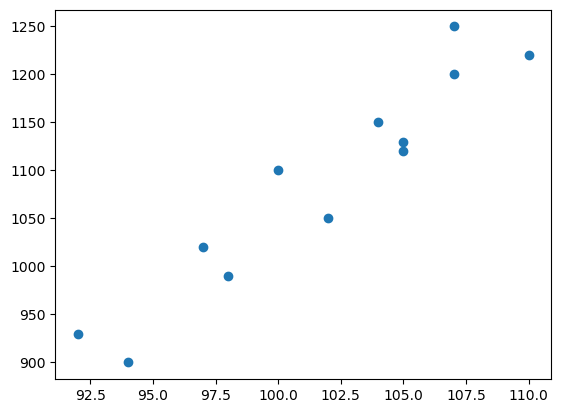

In [38]:
# Assemption 1.
# Linearity: There should be linear relationship between dependent and independent features

plt.scatter(data.Advt,data.Sales)

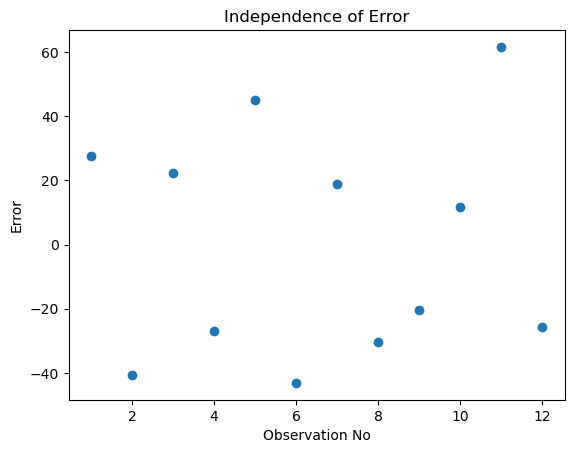

In [39]:
# Assumption 2 : Independence of Residuals
# X- axis:  observation number, y-axis = error

plt.scatter(copied_data['Observation no'],residuals)
plt.title('Independence of Error')
plt.xlabel('Observation No')
plt.ylabel('Error')
plt.show()

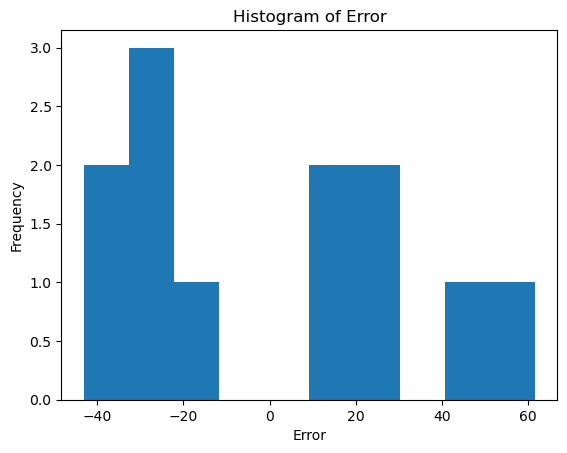

In [40]:
# Assemption 3.
# Normality of Residuals: The residuals should be approximately normally distributed. 


plt.hist(residuals)
plt.title('Histogram of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

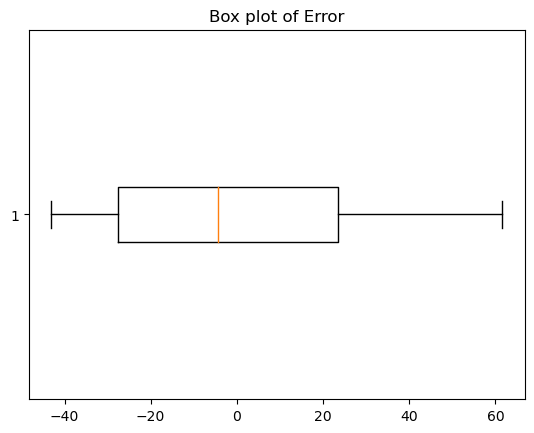

In [41]:
plt.boxplot(residuals,vert=False)
plt.title('Box plot of Error')
plt.show()

In [42]:
data.head()

,Advt,Sales
0,92,930
1,94,900
2,97,1020
3,98,990
4,100,1100


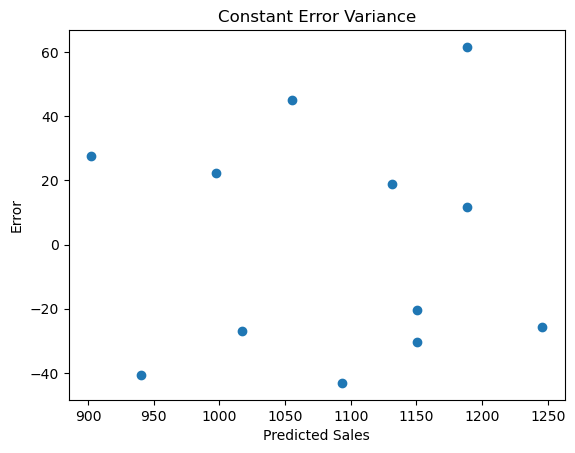

In [43]:
# Assumption 4 :  Independence of Error
# X-axis : predicted values , y-axis = error

plt.scatter(y_pred,residuals)
plt.title('Constant Error Variance')
plt.xlabel('Predicted Sales')
plt.ylabel('Error')
plt.show()

In [44]:
data.head(1)

,Advt,Sales
0,92,930


In [45]:
data.columns

Index(['Advt', 'Sales'], dtype='object')

In [46]:
data_slr=data

In [47]:
data_slr['Residuals']=residuals

<Axes: >

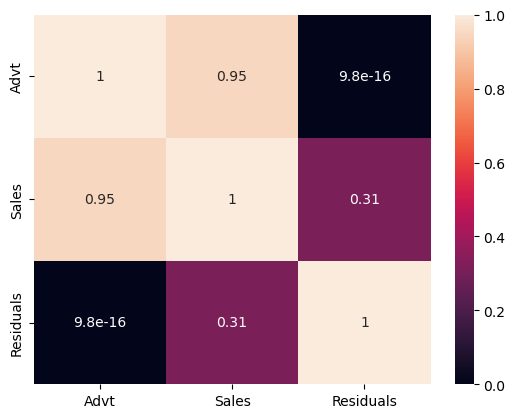

In [48]:
sns.heatmap(data_slr.corr(),annot=True)